# PYTN_Assgn_3_Batch 006_Christian Lamhot Tua 

In this Assignment 3,I use a Dataset from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing, namely Dataset bank-additional-full.csv  with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

<b>Input Variables:</b>

<b> Bank Client Data:</b>
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<b> Other Attributes:</b>
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means -  client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

<b> Output Variable (Desired Target):</b>
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Data Preprocessing

## Import Library yang diperlukan

In [1]:
# Library Mengolah Data
import numpy as np
import pandas as pd 

# Library Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

# Supaya pesan warning tidak muncul,maka diignore
import warnings
warnings.filterwarnings('ignore')

<b> Untuk menampilkan semua kolom yang ada pada dataset:

In [2]:
pd.set_option("display.max.columns", None) 

## Read Dataset

<b> Untuk read file dataset:</b>

In [3]:
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Menurut deskripsi dataset,kolom duration perlu dihapus karena dalam kasus nyata duration hanya diketahui setelah kolom label diketahui.Ini dapat dianggap sebagai kebocoran data, dimana predictor mencantumkan data yang tidak tersedia pada saat membuat sebuah prediksi  

<b>Menghapus kolom duration:</b>

In [4]:
df.drop('duration', axis=1, inplace=True)

<b>Untuk melihat 5 data teratas dari dataset:</b>

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<b> Untuk merubah nama kolom y menjadi deposit yang sesuai dengan deskripsi pada dataset:</b>

In [6]:
df = df.rename(columns={'y': 'deposit'}) 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<b>Untuk mendapatkan informasi tentang seluruh nama kolom,jumlah data yang kosong ditiap kolom serta tipe data pada masing-masing kolom dataset:</b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

<b> Untuk mengetahui dimensi dari dataset seperti informasi tentang jumlah baris dan kolom:</b>

In [8]:
df.shape

(41188, 20)

<b> Untuk mengetahui daftar nama kolom yang ada didataset:</b>

In [9]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'deposit'], dtype=object)

<b> Untuk mendapatkan ringkasan statistik deskriptif untuk kolom yang berisi tipe data numerik saja seperti count,mean,std,min,max dll: </b>

In [10]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<b> Untuk mendapatkan ringkasan statistik deskriptif untuk kolom yang berisi tipe data string/objek saja seperti count,unique,top dan frequency:</b>

In [11]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


<b> Untuk mendapatkan jumlah banyaknya setiap data dengan nama yang berbeda/unique pada setiap kolom dataset: </b>

In [12]:
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
deposit             2
dtype: int64

<b> Untuk melakukan konversi tipe data category yang sesuai dengan nama kolomnya:

In [13]:
cols_ctg = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']
for cols in cols_ctg:
    df[cols] = df[cols].astype('category')

<b>Untuk mendapatkan informasi tentang seluruh nama kolom,jumlah data yang kosong ditiap kolom serta tipe data setelah melakukan konversi tipe data category yang sesuai dengan masing-masing kolom dataset:</b>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  category
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

## Mengidentifikasi Duplikasi Data

<b> Untuk melakukan pengecekan apakah ada data yang duplicate pada dataset:

In [15]:
df.duplicated().any()

True

<b> Untuk melihat jumlah duplikasi data pada dataset:

In [16]:
df.duplicated().sum()

1784

Terdapat sebanyak 1784 data yang duplicate pada dataset

<b> Menampilkan 1784 duplikasi data yang telah dihapus pada dataset:

In [17]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40404,41,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40804,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no
40806,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no
40833,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no


<b>Untuk menghitung jumlah baris dan kolom setelah menghapus duplikasi data pada dataset:

In [18]:
df.drop_duplicates(inplace=True)
print('Total baris sekarang:', sum(df.duplicated()))
print('Total kolom sekarang:', df.shape[0])

Total baris sekarang: 0
Total kolom sekarang: 39404


## Melakukan Pengecekan Missing Values

Untuk melakukan pengecekan missing values pada dataset berupa nilai NaN/null:

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

<b> Setelah dilakukan pengecekan,tidak ada missing value pada dataset berupa nilai NaN/null yang terdeteksi. </b>

# Exploratory Data Analysis

## Numerical Features

Menampilkan statistik deskriptif numerical features:

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39404.0,40.116105,10.460328,17.000,32.000,38.000,47.000,98.000
campaign,39404.0,2.618744,2.814780,1.000,1.000,2.000,3.000,56.000
pdays,39404.0,960.847097,190.869184,0.000,999.000,999.000,999.000,999.000
previous,39404.0,0.178738,0.503172,0.000,0.000,0.000,0.000,7.000
emp.var.rate,39404.0,0.064067,1.577041,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,39404.0,93.577538,0.583820,92.201,93.075,93.798,93.994,94.767
cons.conf.idx,39404.0,-40.499604,4.644327,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,39404.0,3.601243,1.742337,0.634,1.334,4.857,4.961,5.045
nr.employed,39404.0,5165.986481,72.763866,4963.600,5099.100,5191.000,5228.100,5228.100


Dari statistik deskriptif numerical features diatas,dapat diketahui bahwa:
- Target **age** berkisar antara 17 hingga 98 tahun.
- Beberapa data seperti <b> durasi, kampanye, dll.</b>,diperkirakan memiliki outlier karena rentang nilainya luas.
- <b> Duration, pdays, and previous</b> mempunyai nilai 0 sebagai minimum.
- Beberapa variabel memiliki nilai negatif seperti **emp.var.rate dan cons.conf.idx**

In [21]:
cols_number = df.select_dtypes(include='number').columns.tolist()
print(cols_number)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


- Saya akan memvisualisasikan setiap target untuk melihat apakah beberapa fitur menunjukkan tren yang dapat memengaruhi keputusan mereka untuk berlangganan atau tidak.
- Saya menggunakan boxplot untuk memetakan jangkauan dan distribusi fitur yang dibagi menjadi preferensi mereka untuk berlangganan, dan distplot untuk melihat distribusi fitur

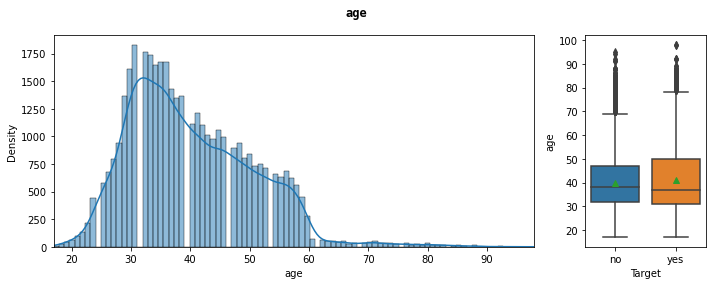

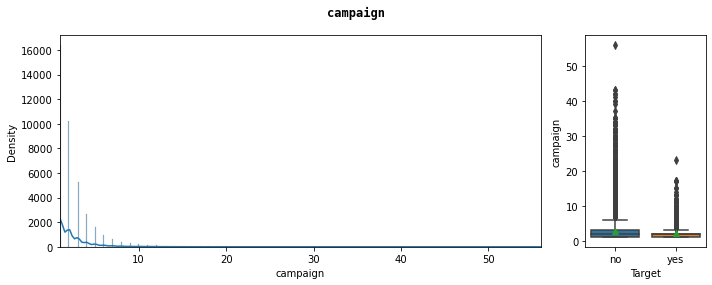

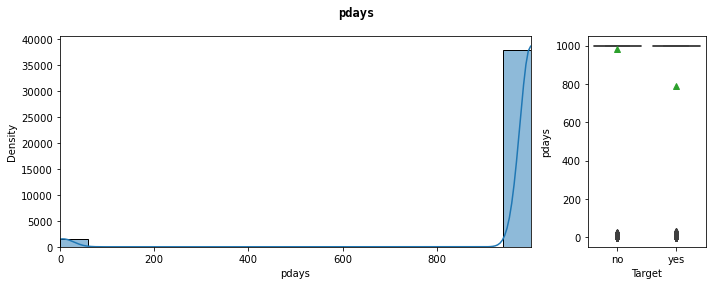

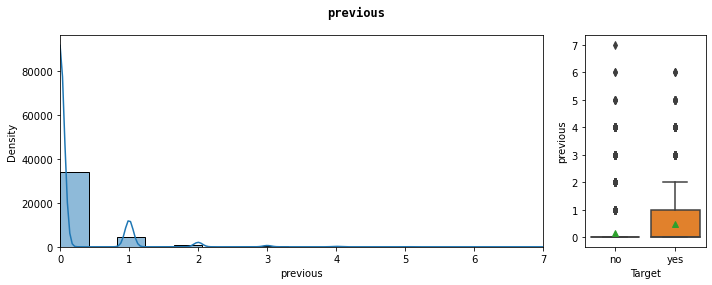

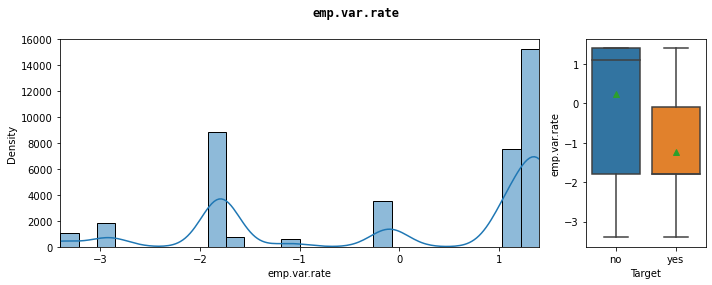

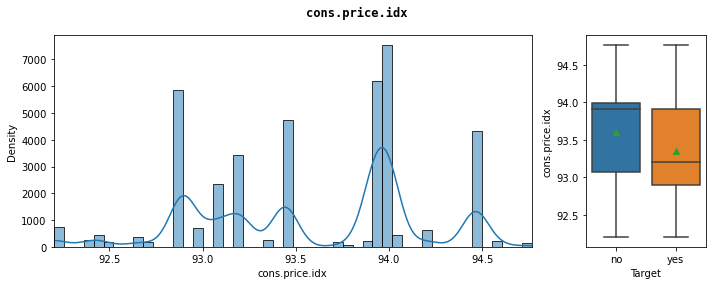

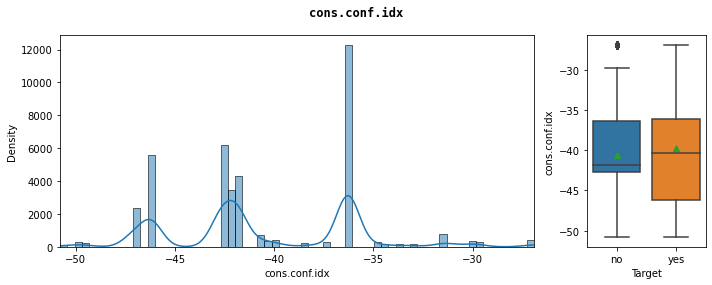

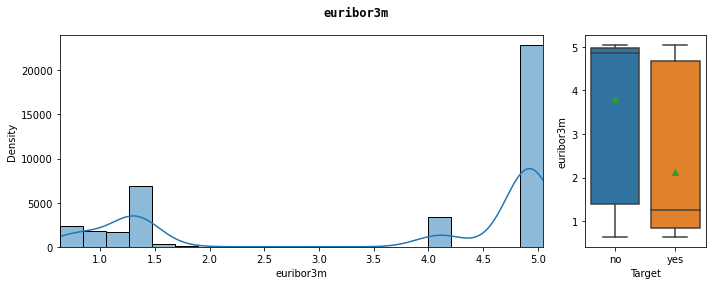

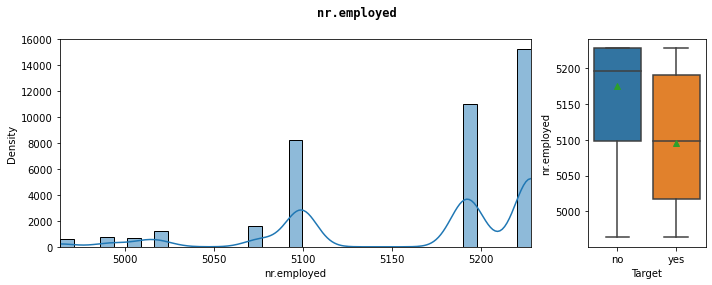

In [22]:
for cols in cols_number:
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(10, 4), tight_layout=True)
    fig.suptitle(cols, fontsize='large', fontweight='bold', family='monospace')

    sns.histplot(df[cols], ax=ax[0], kde=True)
    ax[0].set_ylabel('Density')
    ax[0].margins(x=0)

    sns.boxplot(ax=ax[1], x='deposit', y=cols, data=df, showmeans=True)
    ax[1].set_xlabel('Target')

    plt.show()

Dari boxplot dan distplot diatas,dapat diketahui bahwa:
- Rentang usia pelanggan adalah 17 hingga 98 tahun, tetapi sebagian besar pelanggan berusia antara 20-60.
- Target pelanggan sebagian besar memiliki lebih dari 5000 karyawan. 
- Pelanggan yang memiliki karyawan relatif lebih sedikit seiktar 5.000-5.200 karyawan cenderung berlangganan deposito berjangka.

## Categorical Features

In [23]:
cols_ctg = df.select_dtypes(include='category').columns.tolist()
print(cols_ctg)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


Memvisualisasikan distribusi setiap input di setiap Categorical Features menggunakan countplot:

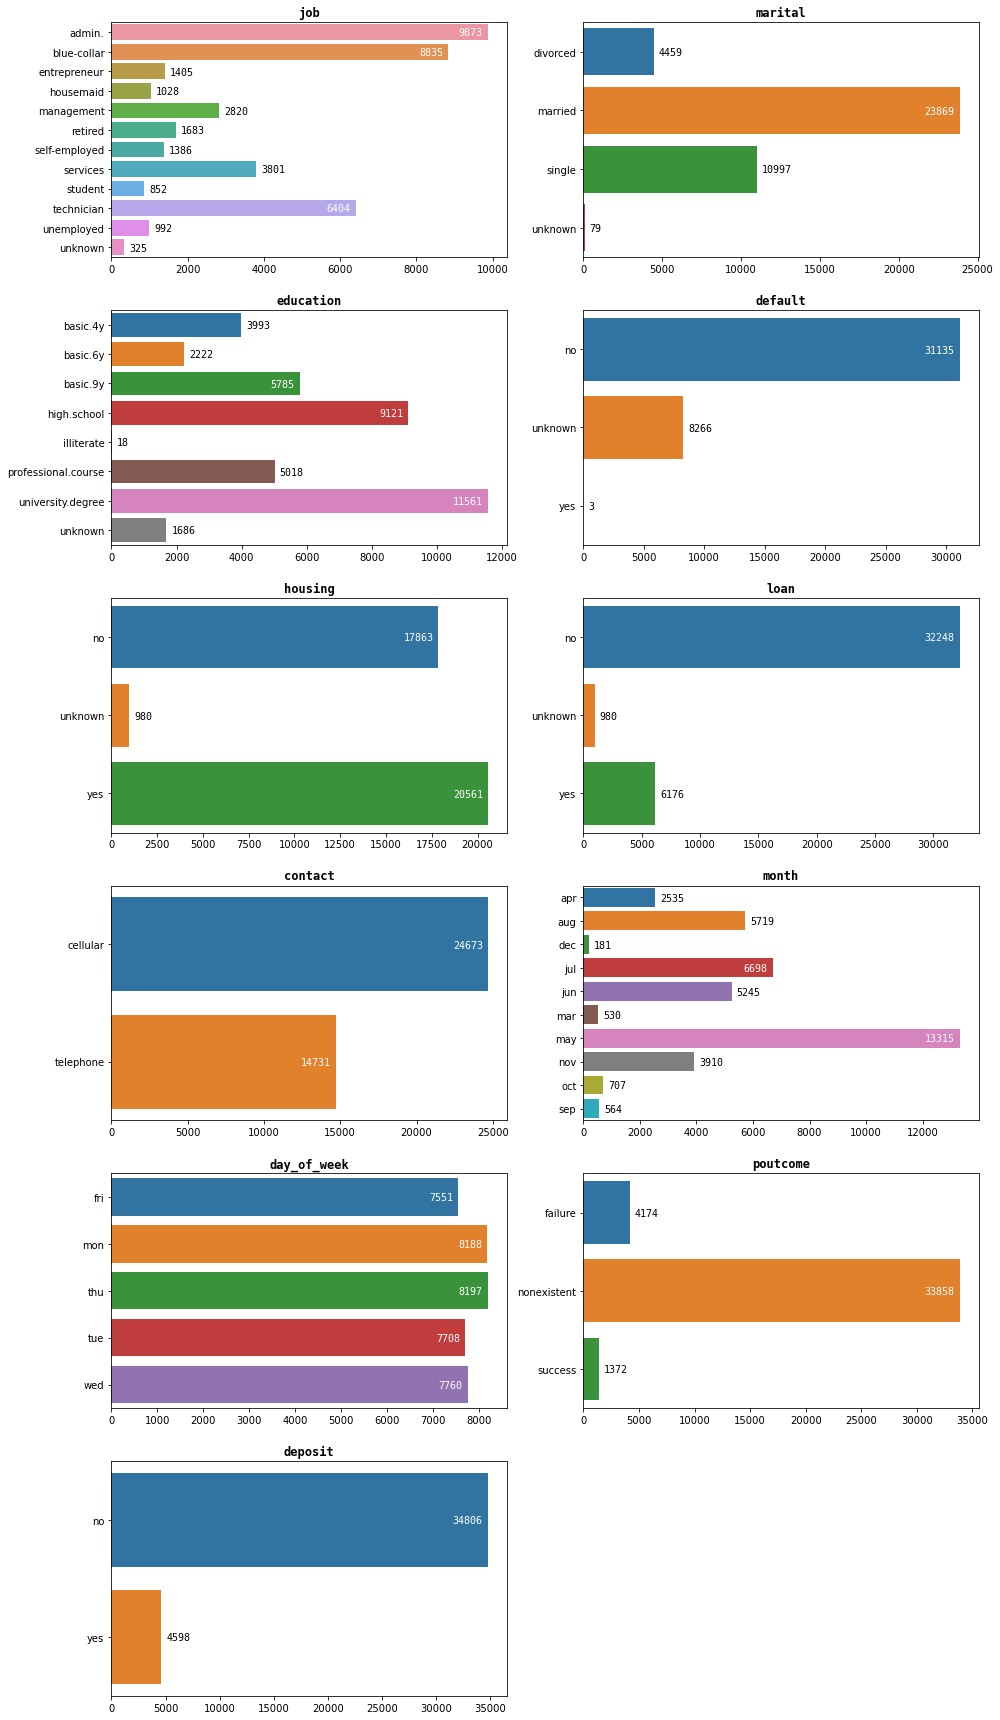

In [24]:
plot_cols = 2
plot_rows = int(-1 * (-1 * len(cols_ctg) // plot_cols))

fig = plt.figure(figsize=(7*plot_cols, 4*plot_rows))

for n_plot, c in enumerate(cols_ctg):
    ax = plt.subplot(plot_rows, plot_cols, n_plot+1)
    sns.countplot(y=c, data=df)
    plt.title(c, fontsize='large', fontweight='bold', family='monospace')
    plt.xlabel('')
    plt.ylabel('')
    
    col_half = df[c].value_counts().max() / 2
    for i, p in enumerate(ax.patches):
        if p.get_width() < col_half:
            x_text, align, color = 5, 'left', 'black'
        else:
            x_text, align, color = -5, 'right', 'white'
        ax.annotate(str(p.get_width()), xy=(p.get_width(), p.get_y() + p.get_height() / 2), 
                    textcoords="offset points", xytext=(x_text, -3.5), ha=align, 
                    color=color, family='monospace')

plt.tight_layout(h_pad=2)
plt.show()

<b> Dari countplot diatas dapat diketahui bahwa:</b>
- Sebagian besar pelanggan bekerja sebagai admin, blue-collar, or technician.
- Sebagian besar pelanggan sudah menikah
- Sebagian besar pelanggan memiliki gelar universitas dan ijazah sekolah menengah atas.
- Sebagian besar pelanggan tidak melakukan transaksi kredit.
- Sebagian besar pelanggan menggunakan nomor seluler untuk mengontak mereka.
- Sebagian besar pelanggan memiliki pinjaman perumahan dan tidak memiliki pinjaman pribadi
- kampanye pemasaran langsung dari lembaga perbankan Portugis sebelumnya tidak menunjukkan hasil yang signifikan.
- Sebagian besar pelanggan belum berlangganan deposito berjangka.

# Data Outliers Treatment

Sebelumnya, kita telah melihat bahwa <b> age dan campaign</b> memiliki distribusi data yang miring ke kiri. Pastinya,kita harus mengetahui terlebih dahulu mulai dari nilai apa yang dianggap outlier untuk setiap fitur dengan menghitung batas atas jangkauan interkuartil.

<b> Saya akan menghapus data outlier dari Numerical Features: </b>

In [25]:
df_prep = df.copy()
shape_init = df_prep.shape

#IQR = Q3 - Q1
#UL = Q3 + 1.5 * IQR
def uiqr(f):
    return df_prep[f].quantile(q=0.75) + 1.5 * (df_prep[f].quantile(q=0.75) - df_prep[f].quantile(q=0.25))
    
def info_out(feature):
    count = df_prep[df_prep[feature] > uiqr(feature)][feature].count()
    print(feature.capitalize(), 'above', uiqr(feature), 'are outliers')
    print('Outliers: ' + str(count) + ' from ' + str(len(df_prep)) + ' rows (' 
          + str(round(count*100/len(df_prep), 2)) + '%)')

def rem_out(feature):
    global df_prep
    info_out(feature)
    df_prep = df_prep[df_prep[feature] <= uiqr(feature)]
    print('Outliers removed.')
    print('-' * 40)

print('Initial data frame shape:', shape_init)
print('-' * 40)

cols_out = ['age', 'campaign']
for cols in cols_out:
    rem_out(cols)

shape_now = df_prep.shape
row_diff = shape_init[0]-shape_now[0]
print('Current data frame shape:', shape_now)
print('Removed total ' + str(row_diff) + ' rows (' + str(round(row_diff*100/shape_init[0], 2)) + '%)')

Initial data frame shape: (39404, 20)
----------------------------------------
Age above 69.5 are outliers
Outliers: 458 from 39404 rows (1.16%)
Outliers removed.
----------------------------------------
Campaign above 6.0 are outliers
Outliers: 2384 from 38946 rows (6.12%)
Outliers removed.
----------------------------------------
Current data frame shape: (36562, 20)
Removed total 2842 rows (7.21%)


<b> Memvisualisaikan boxplot dan distplot pada kolom age dan campaign pada numerical features:

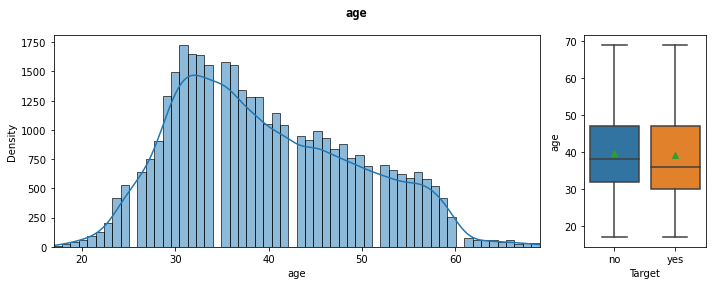

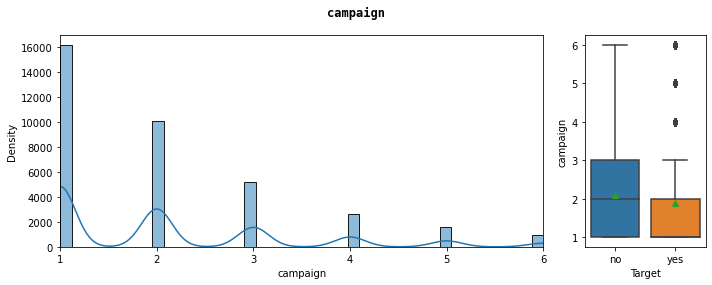

In [26]:
for cols in cols_out:
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(10, 4), tight_layout=True)
    fig.suptitle(cols, fontsize='large', fontweight='bold', family='monospace')

    sns.histplot(df_prep[cols], ax=ax[0], kde=True)
    ax[0].set_ylabel('Density')
    ax[0].margins(x=0)

    sns.boxplot(ax=ax[1], x='deposit', y=cols, data=df_prep, showmeans=True)
    ax[1].set_xlabel('Target')

    plt.show()

##  Encoding Categorical Features

Data Categorical harus dikodekan supaya dapat dibandingkan dengan data numerik. Nilai dalam fitur **deposit** harus diganti secara terpisah untuk menghindari pengkodean dengan hasil sebaliknya, di mana 1 harus untuk 'ya' dan 0 untuk 'tidak'. Untuk saat ini, saya menggunakan **LabelEncoder** untuk mengkodekan sisanya.Metode lain yang dapat digunakan adalah menggunakan <b>get_dummies</b> untuk mengubah variabel kategori menjadi variabel dummy/indikator.

In [27]:
df_prep['deposit'] = df_prep['deposit'].replace({'yes': 1, 'no': 0})
cols_ctg.remove('deposit')

In [28]:
LE = LabelEncoder()
for c in cols_ctg:
    df_prep[c] = LE.fit_transform(df_prep[c])

with pd.option_context('max_columns', None):
    display(df_prep.sample(n=10, random_state=1))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
33033,31,9,2,6,0,2,0,0,6,1,2,999,0,1,-1.8,92.893,-46.2,1.299,5099.1,0
3619,57,5,1,3,1,2,0,1,6,0,2,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0
19836,32,0,1,6,1,2,0,0,1,0,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0
16806,57,6,1,6,0,0,0,0,3,2,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
38823,39,4,2,6,0,2,0,0,7,0,2,3,2,2,-3.4,92.649,-30.1,0.714,5017.5,1
36721,36,9,2,5,0,0,0,0,4,0,2,999,0,1,-2.9,92.963,-40.8,1.268,5076.2,1
30441,39,0,1,3,0,2,0,0,6,1,3,999,0,1,-1.8,92.893,-46.2,1.354,5099.1,1
24058,31,9,2,6,0,0,0,1,8,2,1,999,0,1,-0.1,93.798,-40.4,4.794,5195.8,1
1180,39,0,1,1,1,0,0,1,6,2,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
28099,43,4,1,6,1,0,0,0,0,0,2,999,0,1,-1.8,93.075,-47.1,1.479,5099.1,0


## Correlation of Features

<b> Memvisualisasikan korelasi antara masing-masing fitur menggunakan visualisasi heatmap:

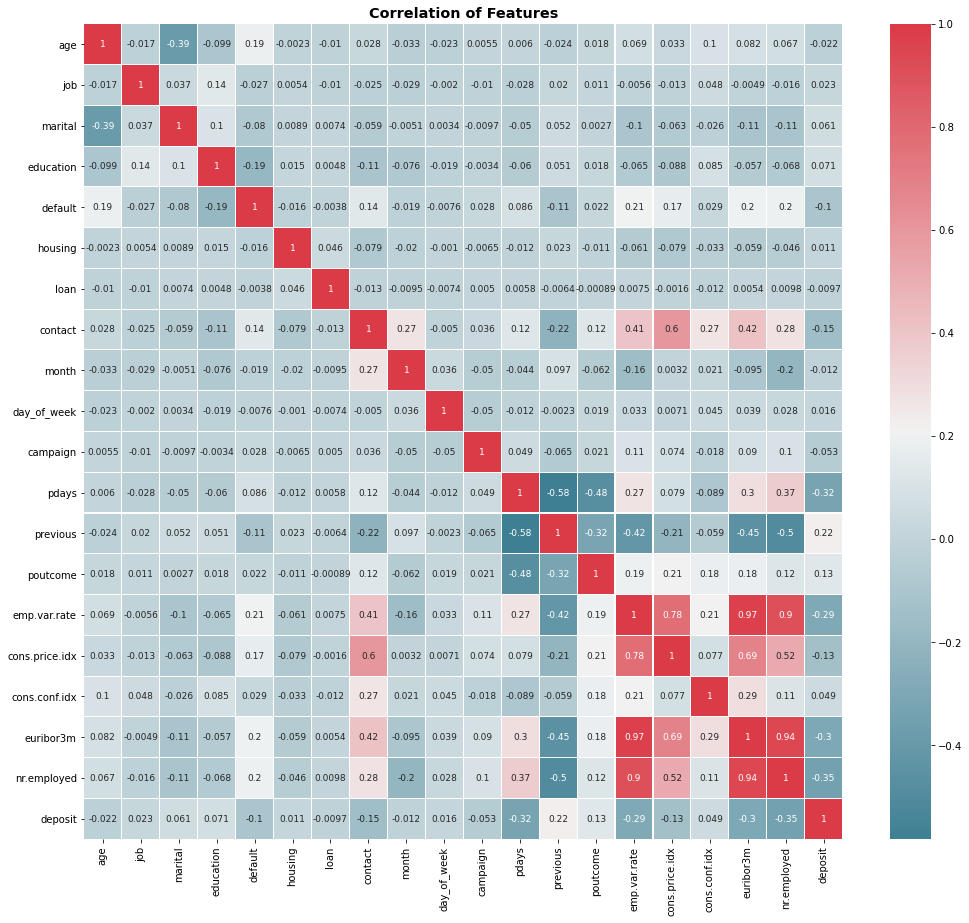

In [29]:
plt.figure(figsize=(17, 15))
plt.title('Correlation of Features', fontsize='x-large', fontweight='bold')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_prep.corr(), annot=True, cmap=cmap, linewidths=.1, annot_kws={'size': 9})
plt.show()

Visualisasi heatmap menunjukkan korelasi antara fitur melalui angka dan warna.Seperti yang kita lihat,warna merah menunjukkan korelasi positif dan warna teal menunjukkan korelasi negatif serta ada beberapa fitur yang memiliki korelasi tinggi satu sama lain. 

## Split Data

Sebelum dapat digunakan untuk pemodelan, kita perlu memisahkan fitur input ke dalam variabel x dan menetapkan fitur target ke dalam variabel y. Kemudian, pisahkan data kita menjadi training set dan test set dengan rasio 7:3.

In [30]:
x = df_prep.drop('deposit', 1)
y = df_prep.deposit
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

print('Data frame size:', df_prep.shape)
print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

Data frame size: (36562, 20)
Training set size: (25593, 19)
Test set size: (10969, 19)


## Scale Data

Kita perlu menskalakan fitur input untuk memenuhi distribusi normal standar dan diharapkan dapat membantu meningkatkan akurasi model.

In [31]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

display(x_test_scaled)

array([[-0.58180145,  1.45752596,  1.3522696 , ..., -2.03694114,
        -1.18649073, -0.92086676],
       [-0.88934956,  1.45752596,  1.3522696 , ...,  0.96321926,
         0.79282621,  0.86962307],
       [-0.47928541, -1.03745511, -0.28538884, ...,  0.96321926,
         0.79282621,  0.86962307],
       ...,
       [ 0.03329478,  1.45752596, -0.28538884, ...,  0.96321926,
         0.79455085,  0.86962307],
       [-1.09438164, -0.76023499, -0.28538884, ..., -0.31023012,
         0.30820112,  0.42130663],
       [ 0.85342308,  0.07142537, -0.28538884, ..., -0.31023012,
         0.30820112,  0.42130663]])

# Data Modelling

Saya akan membuat beberapa model algoritma untuk memprediksi classification data yaitu: Logistic Regression, KNN, SVM, Decision Tree, Random Forest, dan Naive Bayes.

## Logistic Regression

Membuat model dengan algoritma Logistic Regression dan train the data.Setelah itu dilakukan,kita akan mendapatkan classification report untuk mengevaluasi model.

In [32]:
model_LR = LogisticRegression(solver='liblinear', random_state=11)
model_LR.fit(x_train_scaled, y_train)
y_pred_LR = model_LR.predict(x_test_scaled)

print(classification_report(y_test, y_pred_LR), end='')

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9741
           1       0.66      0.23      0.34      1228

    accuracy                           0.90     10969
   macro avg       0.79      0.61      0.64     10969
weighted avg       0.88      0.90      0.88     10969


Kita bisa mendapatkan accuracy score for both training and test dataset dengan cara:

In [33]:
result_lr = round(model_LR.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_LR.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_lr) + '%')

Training accuracy: 89.427%
Test accuracy:     90.045%


Memvisualisasikan confusion matrix:

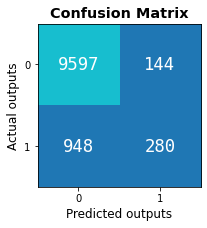

In [34]:
def cmplot(cm):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(cm, cmap='tab10')
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize='large')
    ax.set_ylabel('Actual outputs', fontsize='large')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white', 
                    fontsize='xx-large', fontfamily='monospace')
    plt.title('Confusion Matrix', fontsize='x-large', fontweight='bold')
    plt.show()

cmplot(confusion_matrix(y_test, y_pred_LR))

**Dari Confusion Matriks diatas,dapat diketahui bahwa:**

- True Positive (TP): Ada **280** observasi yang diprediksi dengan **benar** untuk **'ya'** (pelanggan telah melakukan deposit)
- True Negative (TN): Ada **9597** observasi yang diprediksi dengan **benar** untuk **'tidak'** (pelanggan tidak melakukan deposit)
- False Positive (FP): Ada **144** observasi yang **salah** diprediksi sebagai **'ya'**
- False Negative (FN): Ada **948** observasi yang **salah** diprediksi sebagai **'tidak'**

<b>Catatan: </b>
- 0 menunjukkan output negatif karena mewakili kata 'tidak'. 
- 1 menunjukkan output positif karena mewakili kata 'ya'.

## K-Nearest Neighbors (KNN)

Membuat model dengan algoritma K-Nearest Neighbors (KNN) dan train the data.Untuk mendapatkan nilai akurasi terbaik,saya harus mencari nilai K yang optimum. Saya akan melakukan prediksi dengan K = 2 hingga 30 dan membandingkannya.

<b> Catatan: Ini akan memakan waktu lebih lama untuk memproses kode</b>.Timer disertakan untuk melihat perkiraan waktu yang diperlukan untuk memproses.

In [35]:
tic = default_timer()

min_k = 2
max_k = 30
err, acc = [], []
for i in range(min_k, max_k+1):
    print('\r', 'Processing K =', i, end='. Please wait...')
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(x_train_scaled, y_train)
    y_pred_KNN = model_KNN.predict(x_test_scaled)
    err.append(np.mean(y_pred_KNN != y_test))
    acc.append(accuracy_score(y_test, y_pred_KNN))

print('\rMinimum error:   ', round(min(err), 5), 'at K =', min_k + err.index(min(err)))
print('Maximum accuracy:', round(max(acc), 5), 'at K =', min_k + acc.index(max(acc)))
k_choice = min_k + acc.index(max(acc))

toc = default_timer()
print('Elapsed time: ' + str(round(toc-tic)) + ' sec.')

Minimum error:    0.09983 at K = 22
Maximum accuracy: 0.90017 at K = 22
Elapsed time: 302 sec.


Memvisualisasikan kinerja model dengan berbagai nilai K:

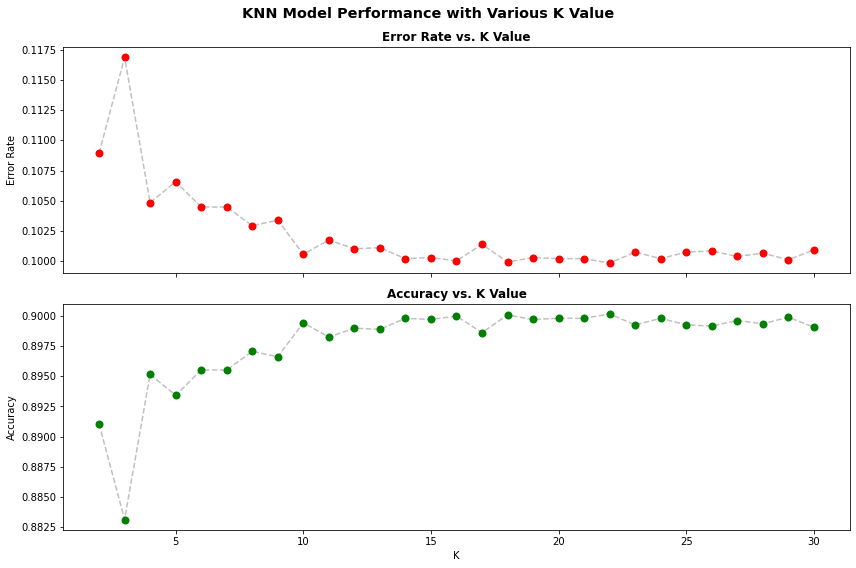

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), tight_layout=True, sharex=True)
fig.suptitle('KNN Model Performance with Various K Value', fontsize='x-large', fontweight='bold')

ax[0].plot(range(min_k, max_k+1), err, color='silver', linestyle='dashed', 
           marker='o', markerfacecolor='red', markersize=8, markeredgewidth=0)
ax[0].set_title('Error Rate vs. K Value', fontweight='bold')
ax[0].set_ylabel('Error Rate')

ax[1].plot(range(min_k, max_k+1), acc, color='silver', linestyle='dashed', 
           marker='o', markerfacecolor='green', markersize=8, markeredgewidth=0)
ax[1].set_title('Accuracy vs. K Value', fontweight='bold')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('K')

plt.show()

**Dari perhitungan dan plot di atas,**
- saya mendapatkan akurasi model terbaik dengan menggunakan nilai K = 22. 
- Error rate adalah nilai akurasi yang dicerminkan.Dengan Error Rate,kita bisa mendapatkan classification report.

In [37]:
model_KNN = KNeighborsClassifier(n_neighbors=k_choice)
model_KNN.fit(x_train_scaled, y_train)
y_pred_KNN = model_KNN.predict(x_test_scaled)

print(classification_report(y_test, y_pred_KNN), end='')

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9741
           1       0.65      0.24      0.35      1228

    accuracy                           0.90     10969
   macro avg       0.78      0.61      0.65     10969
weighted avg       0.88      0.90      0.88     10969


Kita bisa mendapatkan accuracy score for both training and test dataset dengan cara:

In [38]:
result_knn = round(max(acc) * 100, 3)

print('Training accuracy: ' + str(round(model_KNN.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_knn) + '%')

Training accuracy: 89.739%
Test accuracy:     90.017%


Memvisualisasikan confusion matrix:

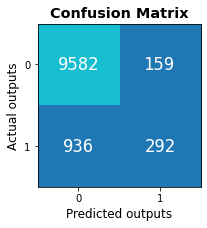

In [39]:
cmplot(confusion_matrix(y_test, y_pred_KNN))

**Dari Confusion Matriks diatas,dapat diketahui bahwa:**

- True Positive (TP): Ada **292** observasi yang diprediksi dengan **benar** untuk **'ya'** (pelanggan telah melakukan deposit)
- True Negative (TN): Ada **9582** observasi yang diprediksi dengan **benar** untuk **'tidak'** (pelanggan tidak melakukan deposit)
- False Positive (FP): Ada **159** observasi yang **salah** diprediksi sebagai **'ya'**
- False Negative (FN): Ada **936** observasi yang **salah** diprediksi sebagai **'tidak'**

<b>Catatan: </b>
- 0 menunjukkan output negatif karena mewakili kata 'tidak'. 
- 1 menunjukkan output positif karena mewakili kata 'ya'.

## Support Vector Machine (SVM)

Membuat model dengan algoritma Support Vector Machine (SVM) dan train the data.

<b>Catatan: Ini akan memakan waktu lebih lama untuk memproses kode.</b>Timer disertakan untuk melihat perkiraan waktu yang diperlukan untuk memproses

In [40]:
tic = default_timer()
print('\r', 'Processing...', end='')

model_SVM = SVC(kernel='linear', C=0.1)
model_SVM.fit(x_train_scaled, y_train)
y_pred_SVM = model_SVM.predict(x_test_scaled)

toc = default_timer()
print('\rElapsed time: ' + str(round(toc-tic)) + ' sec.', end='\n\n')

print(classification_report(y_test, y_pred_SVM), end='')

Elapsed time: 63 sec.

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9741
           1       0.65      0.22      0.33      1228

    accuracy                           0.90     10969
   macro avg       0.78      0.60      0.64     10969
weighted avg       0.88      0.90      0.88     10969


Kita bisa mendapatkan accuracy score for both training and test dataset dengan cara:

In [41]:
result_svm = round(model_SVM.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_SVM.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_svm) + '%')

Training accuracy: 89.106%
Test accuracy:     89.944%


Memvisualisasikan confusion matrix:

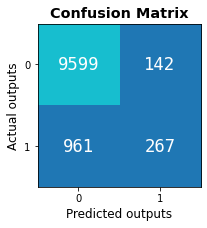

In [42]:
cmplot(confusion_matrix(y_test, y_pred_SVM))

**Dari Confusion Matriks diatas,dapat diketahui bahwa:**

- True Positive (TP): Ada **267** observasi yang diprediksi dengan **benar** untuk **'ya'** (pelanggan telah melakukan deposit)
- True Negative (TN): Ada **9599** observasi yang diprediksi dengan **benar** untuk **'tidak'** (pelanggan tidak melakukan deposit)
- False Positive (FP): Ada **142** observasi yang **salah** diprediksi sebagai **'ya'**
- False Negative (FN): Ada **961** observasi yang **salah** diprediksi sebagai **'tidak'**

<b>Catatan: </b>
- 0 menunjukkan output negatif karena mewakili kata 'tidak'. 
- 1 menunjukkan output positif karena mewakili kata 'ya'.

## Decision Tree

Membuat model dengan algoritma decision tree dan train the data.Setelah itu dilakukan,kita akan mendapatkan classification report untuk mengevaluasi model.

In [43]:
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_DT.fit(x_train_scaled, y_train)
y_pred_DT = model_DT.predict(x_test_scaled)

print(classification_report(y_test, y_pred_DT), end='')

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9741
           1       0.61      0.32      0.42      1228

    accuracy                           0.90     10969
   macro avg       0.76      0.65      0.68     10969
weighted avg       0.88      0.90      0.89     10969


Kita bisa mendapatkan accuracy score for both training and test dataset dengan cara:

In [44]:
result_dt = round(model_DT.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_DT.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_dt) + '%')

Training accuracy: 89.825%
Test accuracy:     90.099%


Melakukan visualisasi dengan the decision tree:

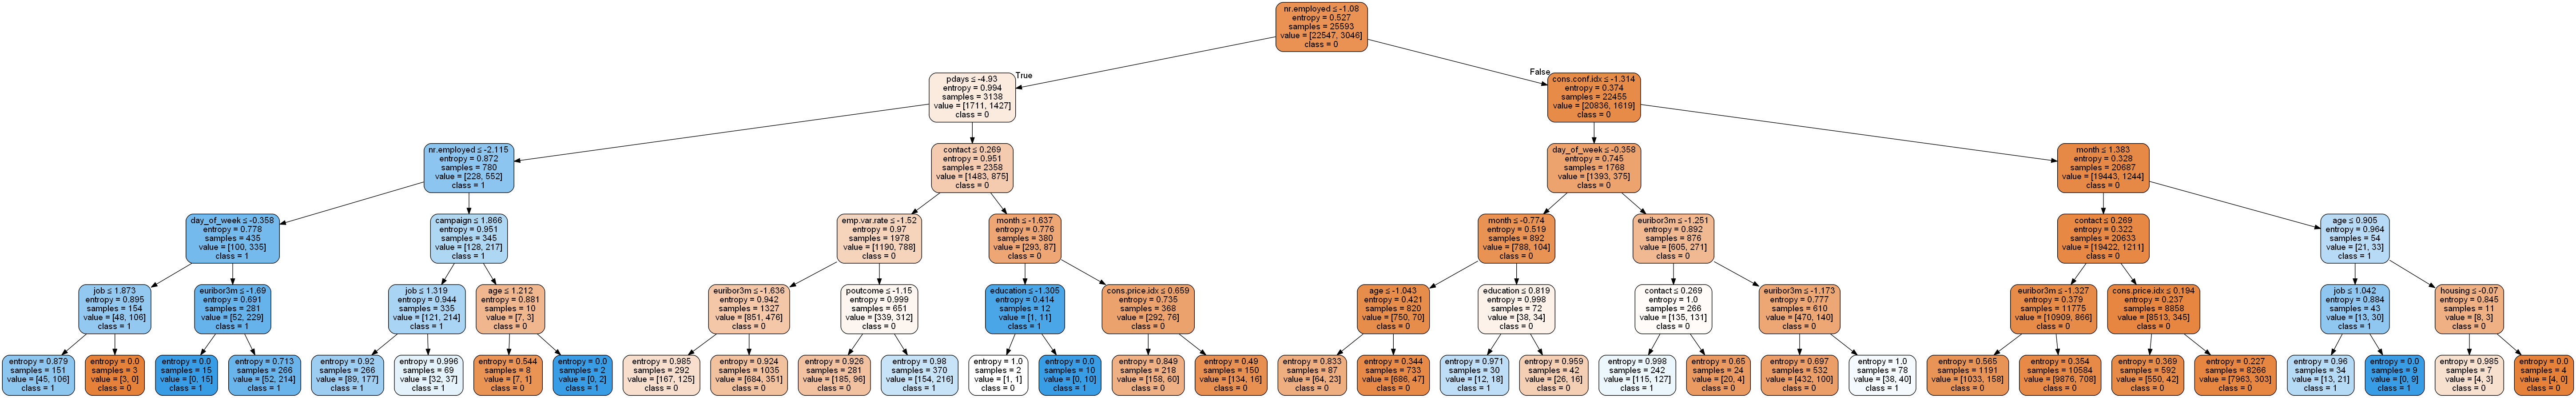

In [45]:
dot_data = StringIO()
tree.export_graphviz(
    model_DT, 
    out_file=dot_data, 
    class_names=['0','1'], 
    feature_names=list(x_train.columns), 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

Memvisualisasikan confusion matrix:

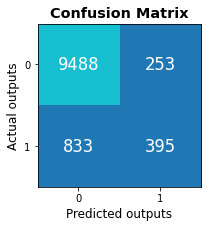

In [46]:
cmplot(confusion_matrix(y_test, y_pred_DT))

**Dari Confusion Matriks diatas,dapat diketahui bahwa:**

- True Positive (TP): Ada **395** observasi yang diprediksi dengan **benar** untuk **'ya'** (pelanggan telah melakukan deposit)
- True Negative (TN): Ada **9488** observasi yang diprediksi dengan **benar** untuk **'tidak'** (pelanggan tidak melakukan deposit)
- False Positive (FP): Ada **253** observasi yang **salah** diprediksi sebagai **'ya'**
- False Negative (FN): Ada **833** observasi yang **salah** diprediksi sebagai **'tidak'**

<b>Catatan: </b>
- 0 menunjukkan output negatif karena mewakili kata 'tidak'. 
- 1 menunjukkan output positif karena mewakili kata 'ya'.

## Random Forest

Membuat model dengan algoritma random forest dan train the data.Setelah itu dilakukan,kita akan mendapatkan classification report untuk mengevaluasi model.

In [47]:
model_RF = RandomForestClassifier(random_state=11)
model_RF.fit(x_train_scaled, y_train)
y_pred_RF = model_RF.predict(x_test_scaled)

print(classification_report(y_test, y_pred_RF), end='')

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9741
           1       0.54      0.31      0.39      1228

    accuracy                           0.89     10969
   macro avg       0.73      0.64      0.67     10969
weighted avg       0.88      0.89      0.88     10969


Kita bisa mendapatkan accuracy score for both training and test dataset dengan cara:

In [48]:
result_rf = round(model_RF.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_RF.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_rf) + '%')

Training accuracy: 99.558%
Test accuracy:     89.361%


Memvisualisasikan confusion matrix:

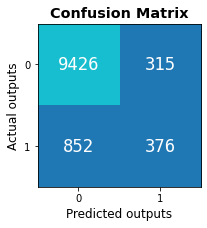

In [49]:
cmplot(confusion_matrix(y_test, y_pred_RF))

**Dari Confusion Matriks diatas,dapat diketahui bahwa:**

- True Positive (TP): Ada **376** observasi yang diprediksi dengan **benar** untuk **'ya'** (pelanggan telah melakukan deposit)
- True Negative (TN): Ada **9426** observasi yang diprediksi dengan **benar** untuk **'tidak'** (pelanggan tidak melakukan deposit)
- False Positive (FP): Ada **315** observasi yang **salah** diprediksi sebagai **'ya'**
- False Negative (FN): Ada **852** observasi yang **salah** diprediksi sebagai **'tidak'**

<b>Catatan: </b>
- 0 menunjukkan output negatif karena mewakili kata 'tidak'. 
- 1 menunjukkan output positif karena mewakili kata 'ya'.

## Naive Bayes

Membuat model dengan algoritma random naive Bayes (Gaussian) and train the data Kemudian, kita akan mendapatkan laporan klasifikasi untuk mengevaluasi model.

In [50]:
model_GNB = GaussianNB()
model_GNB.fit(x_train_scaled, y_train)
y_pred_GNB = model_GNB.predict(x_test_scaled)

print(classification_report(y_test, y_pred_GNB), end='')

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      9741
           1       0.32      0.48      0.39      1228

    accuracy                           0.83     10969
   macro avg       0.63      0.68      0.64     10969
weighted avg       0.86      0.83      0.84     10969


Kita bisa mendapatkan accuracy score for both training and test dataset dengan cara:

In [51]:
result_gnb = round(model_GNB.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_GNB.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_gnb) + '%')

Training accuracy: 83.202%
Test accuracy:     82.906%


Memvisualisasikan confusion matrix:

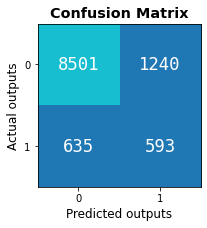

In [52]:
cmplot(confusion_matrix(y_test, y_pred_GNB))

**Dari Confusion Matriks diatas,dapat diketahui bahwa:**

- True Positive (TP): Ada **593** observasi yang diprediksi dengan **benar** untuk **'ya'** (pelanggan telah melakukan deposit)
- True Negative (TN): Ada **8501** observasi yang diprediksi dengan **benar** untuk **'tidak'** (pelanggan tidak melakukan deposit)
- False Positive (FP): Ada **1240** observasi yang **salah** diprediksi sebagai **'ya'**
- False Negative (FN): Ada **635** observasi yang **salah** diprediksi sebagai **'tidak'**

<b>Catatan: </b>
- 0 menunjukkan output negatif karena mewakili kata 'tidak'. 
- 1 menunjukkan output positif karena mewakili kata 'ya'.

# Kesimpulan

Saya telah melakukan klasifikasi data pada dataset kampanye pemasaran langsung  lembaga perbankan Portugis dengan berbagai jenis algoritma model prediksi, seperti: Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, dan Gaussian Naive Bayes .

Sebelum menerapkan model untuk memprediksi kelas target,terlebih dahulu saya harus mengetahui tentang distribusi data dan berusaha meminimalkan outlier.<b> Saya  menggunakan data dari file bank-additional-full.csv yang berisi 20 variabel input dan 1 variabel target.Sasarannya adalah keputusan konsumen untuk menyimpan uangnya di bank dengan nilai 'ya' atau 'tidak'. Ternyata dari data yang ada, jumlah orang yang memutuskan untuk menyetorkan uangnya lebih sedikit dibandingkan yang tidak yaitu 34.806 'tidak' dan 4.598 'ya'</b>. Tentu saja, perbedaan yang begitu besar di antara mereka akan mempengaruhi keputusan algoritma untuk membuat prediksi yang lebih akurat dan saya telah membagi dataset  menjadi training dan test set dengan rasio 7:3.

<b> Dari berbagai model algoritma yang telah saya lakukan, ternyata menggunakan algoritma Decision Tree untuk menghasilkan nilai akurasi yang lebih tinggi dibandingkan dengan algoritma lainnya, yaitu 90,099%.Akurasi dapat dikatakan sebagai tingkat kedekatan nilai prediksi dengan nilai sebenarnya dan dapat ditingkatkan jika kita mengoptimalkan parameter model.</b> 

<b> Untuk KNN, Proses pemilihan nilai K terbaik yaitu K=22 </b>

<b> Grafik di bawah ini adalah perbandingan antara skor akurasi dari model algoritma yang kami jalankan di atas:

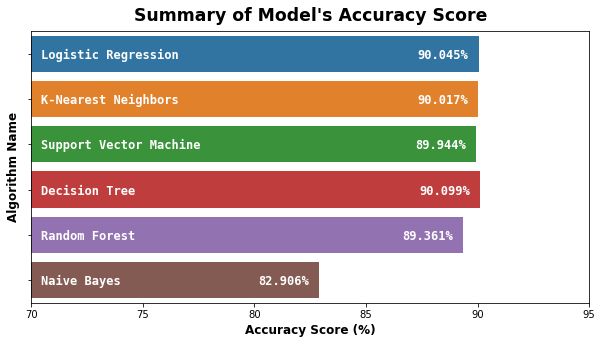

In [53]:
result = pd.DataFrame({
    'Algorithm': [
        'Logistic Regression', 
        'K-Nearest Neighbors', 
        'Support Vector Machine', 
        'Decision Tree', 
        'Random Forest', 
        'Naive Bayes'
    ], 
    'Accuracy': [result_lr, result_knn, result_svm, result_dt, result_rf, result_gnb]
})

fig = plt.figure(figsize=(10, 5))

ax = sns.barplot(data=result, x='Accuracy', y='Algorithm')
ax.set(xlim=(70, 95))

for i, p in enumerate(ax.patches):
    ax.annotate(str(p.get_width()) + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2), 
                textcoords="offset points", xytext=(-10,-5), ha='right', 
                color='white', fontsize='large', fontweight='bold', family='monospace')
    ax.annotate(result['Algorithm'][i], xy=(70, p.get_y()+p.get_height()/2), 
                textcoords="offset points", xytext=(10,-5), ha='left', 
                color='white', fontsize='large', fontweight='bold', family='monospace')

plt.title('Summary of Model\'s Accuracy Score', fontsize='xx-large', fontweight='bold', pad=10)
ax.set_yticklabels(labels='')
ax.set_xlabel('Accuracy Score (%)', fontsize='large', fontweight='bold')
ax.set_ylabel('Algorithm Name', fontsize='large', fontweight='bold')

plt.show()